# Phase 3 Final Project

* Kevin Gross
* Part Time Flatiron Student

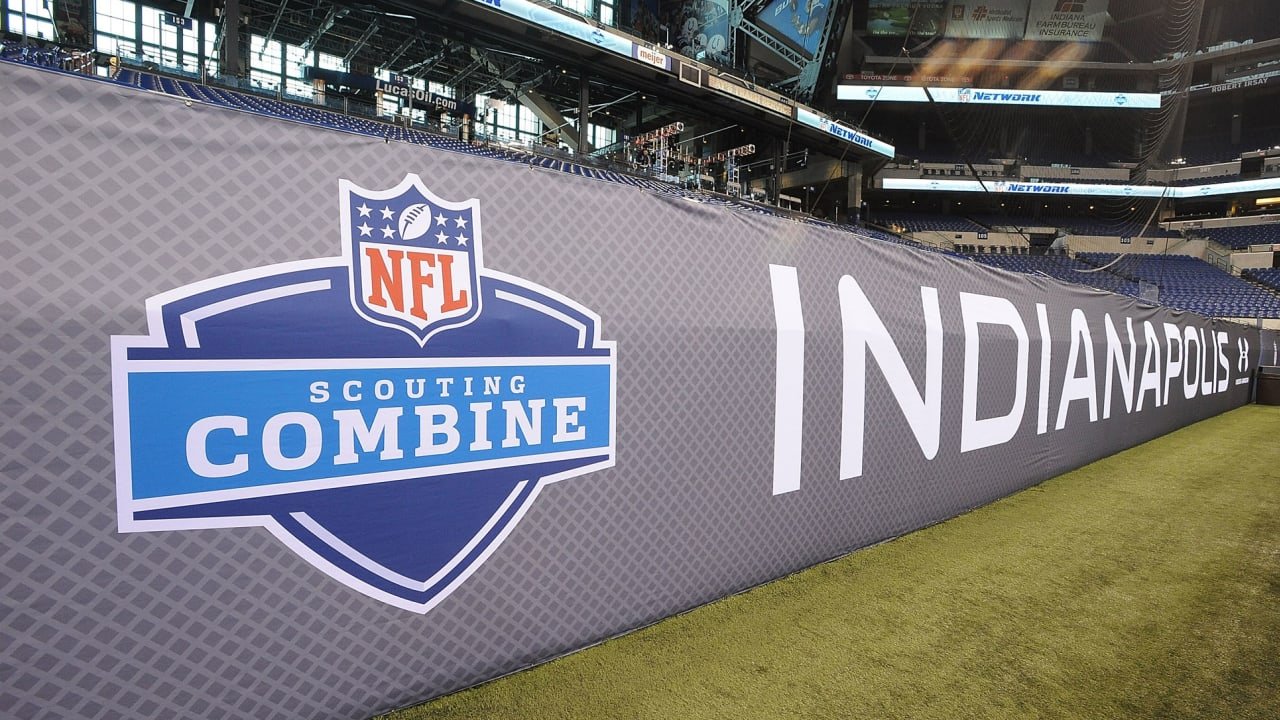

## NFL Combine Data Analysis

### General Overview

### Buisness Problem

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('NFL.csv')

In [3]:
display(df.head())
print(df.shape)

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


(3477, 18)


Right off the bat, we can see that we have almost 3,500 rows, each with 17 feature columns and 1 target column:

* `Year`: Year of attendance at the NFL combine
* `Player`: Player name
* `Age`: Players age (years)
* `School`: College attended
* `Height`: Height (meters)
* `Weight`: Weight (kilograms)
* `Sprint_40yd`: 40 yard sprint time (seconds)
* `Vertical_Jump`: Vertical jump result (centimeters) 
* `Bench_Press_Reps`: Maximum bench press repetitions achieved while lifting 102.1 kg (225 lb) weight
* `Broad_Jump`: Broad jump result (centimeters)
* `Agility_3cone`: Three-cone agility test time (seconds)
* `Shuttle`: Lateral shuttle time (seconds)
* `Drafted..tm.rnd.yr.`: Team the athlete was drafted by, draft round, draft pick, and year
* `BMI`: Body mass index (kg/m2)
* `Player_Type`: Offensive or defensive player or special teams
* `Position_Type`: Broad classification of the athlete's playing position
* `Position`: Playing position
* `Drafted`: Was the player drafted during the NFL draft?

This is a fairly balanced dataset, with 65% of the combine attendees drafted and 35% not drafted.

In [4]:
print("Raw Counts")
print(df['Drafted'].value_counts())
print()
print("Percentages")
print(df['Drafted'].value_counts(normalize=True))

Raw Counts
Yes    2254
No     1223
Name: Drafted, dtype: int64

Percentages
Yes    0.64826
No     0.35174
Name: Drafted, dtype: float64


Thus, a baseline model that always chose the majority class (in this case that a player was drafted) would have an accuracy of 64.8%. 

## Modeling

We are going to try multiple iterations of models in order to maximize our accuracy.

### Logistic Regression - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### K-Nearest Neighbors - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

This algorithm — unlike linear models or tree-based models — does not emphasize learning the relationship between the features and the target. Instead, for a given test record, it finds the most similar records in the training set and returns an average of their target values.

### Decision Trees - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Similar to linear models (and unlike kNN), this algorithm emphasizes learning the relationship between the features and the target. However, unlike a linear model that tries to find linear relationships between each of the features and the target, decision trees look for ways to split the data based on features to decrease the entropy of the target in each split.

## Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

In [6]:
# Check for missing values
df.isna().sum()

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

We can see here that we are missing a good amount of records for a few important columns. However, off the bat we can drop the `Drafted..tm.rnd.yr.` column because it is irrelevant for our model. We can also drop `Position_Type` because this is the same information as `Position` except contains less detail. We can also drop `Player` as we do not care about the player's name.

In [7]:
df.drop(columns=['Drafted..tm.rnd.yr.', 'Position_Type', 'Player'], axis=1, inplace=True)

In [8]:
# Confirm that the columns were dropped
df.isna().sum()

Year                   0
Age                  550
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

Next, let's try to fill in the 550 missing values in the `Age` column.

In [9]:
df['Age'].describe()

count    2927.000000
mean       21.983259
std         0.969490
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

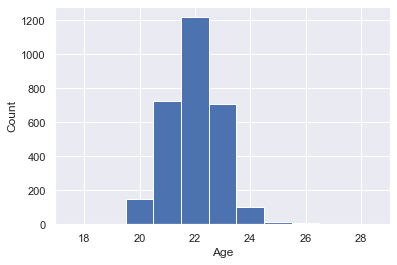

In [10]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="Age", discrete=True, alpha=1.0);

Since age appears to have a Gaussian distribution, let's fill in the blank age ranges using a normal distribution.

In [11]:
# Set a random seed for reproducibility
np.random.seed(8)

# Pull out the index of every row that has NA for 'Age'
index = df[df['Age'].isna()].index

# Use a normal distribution to get random ages based around the mean and standard deviation
value = np.random.normal(loc=df['Age'].mean(), scale=df['Age'].std(), size=df['Age'].isna().sum())

# Round to the nearest whole number
value = value.round(0)

# Fill in the missing indicies using our randomly generated values
df['Age'].fillna(pd.Series(value, index=index), inplace=True)

In [12]:
df['Age'].describe()

count    3477.000000
mean       21.985045
std         0.980128
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

In [13]:
# Confirm that it worked
df.isna().sum()

Year                   0
Age                    0
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

We still have missing values for 6 other columns: `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, and `Shuttle`. Let's look at the distribution of these below.

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


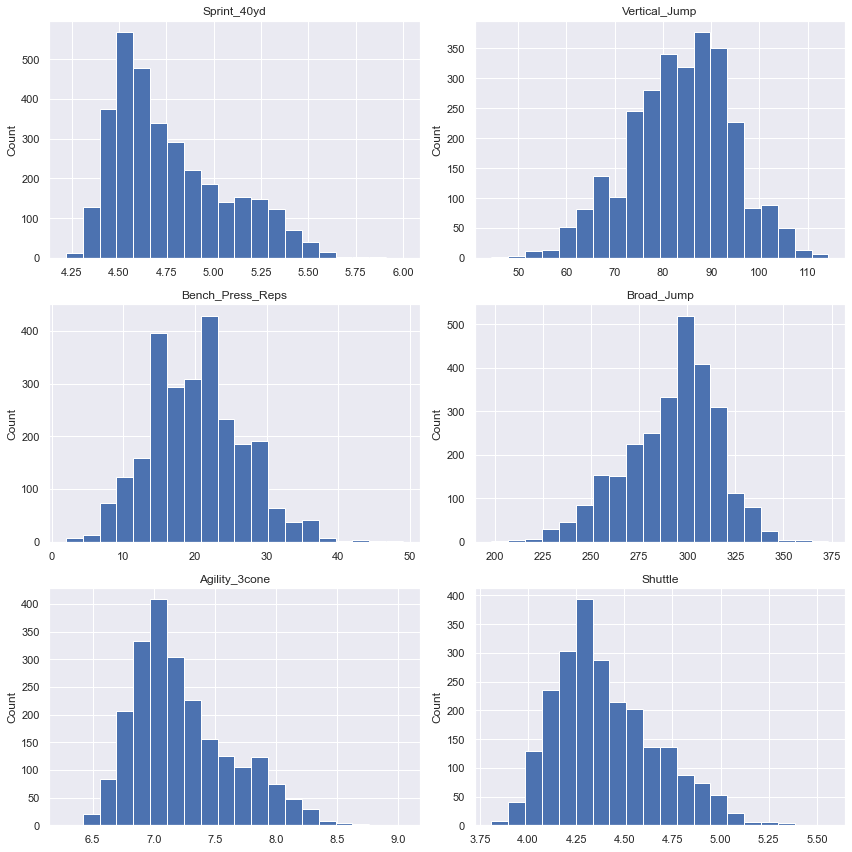

In [14]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(df.columns[5:11]):
    ax = axes[index//2][index%2]
    ax.hist(df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

As we can see above, none of these graphs appear to have a normal distribution. This can be attributed to the fact that each position will have very different sized men, which means they were perform each task at varying levels. For example, a wide receiver is going to be much faster at the `Sprint_40yrd` than an offensive lineman.

In [15]:
wide_receivers = df[df['Position'] == 'WR']
offensive_tackle = df[df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times:')
print(wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times:')
print(offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times:
count    480.000000
mean       4.503646
std        0.097032
min        4.220000
25%        4.430000
50%        4.510000
75%        4.562500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times:
count    258.000000
mean       5.226628
std        0.177057
min        4.710000
25%        5.125000
50%        5.220000
75%        5.337500
max        5.850000
Name: Sprint_40yd, dtype: float64


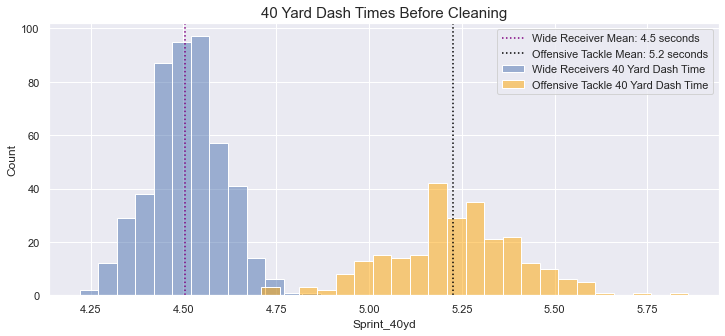

In [16]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times Before Cleaning', size=15)
plt.legend();

### Adding Missing Data

Looking at this data above, it confirms that we need to be very careful about how we input the missing data. Luckily, Scikit-Learn has a tool called Iterative Imputer that we can implment for this type of situation. From SciKit Learn's docstring:

> "Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion."

Let's pull out the columns that are missing data and fit and transform those columns using the Iterative Imputer.

In [17]:
missing = df[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']]
missing

,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,4.38,85.09,25.0,325.12,NaN,NaN
1,4.84,83.82,27.0,292.10,7.38,4.45
2,5.50,NaN,21.0,NaN,NaN,NaN
3,4.49,93.98,15.0,304.80,7.09,4.23
4,4.76,92.71,26.0,304.80,7.10,4.40
...,...,...,...,...,...,...
3472,4.48,95.25,11.0,NaN,NaN,NaN
3473,4.51,100.33,13.0,325.12,NaN,NaN
3474,4.47,100.33,15.0,342.90,6.82,4.14
3475,4.51,82.55,18.0,292.10,7.21,4.19


In [18]:
iter_imp = IterativeImputer(random_state=8)

iter_imp.fit(missing)

missing = iter_imp.transform(missing)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [19]:
missing = pd.DataFrame(missing, columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']).round(2)

In [20]:
df.drop(columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle'], axis=1, inplace=True)

In [21]:
cleaned_df = pd.concat([df, missing], axis=1)
cleaned_df

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.00,325.12,6.88,4.17
1,2009,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.00,292.10,7.38,4.45
2,2009,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.00,243.23,7.97,4.88
3,2009,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.00,304.80,7.09,4.23
4,2009,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.00,304.80,7.10,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,21.0,Central Michigan,1.8034,84.821773,26.080939,defense,CB,No,4.48,95.25,11.00,315.55,6.84,4.15
3473,2019,24.0,South Dakota St.,1.8288,91.172066,27.260221,defense,CB,No,4.51,100.33,13.00,325.12,6.84,4.15
3474,2019,24.0,Washburn,1.8034,88.904105,27.336171,defense,CB,No,4.47,100.33,15.00,342.90,6.82,4.14
3475,2019,22.0,Oregon,1.7526,90.264882,29.386861,defense,S,No,4.51,82.55,18.00,292.10,7.21,4.19


In [22]:
# Confirm that it worked
cleaned_df.isna().sum()

Year                0
Age                 0
School              0
Height              0
Weight              0
BMI                 0
Player_Type         0
Position            0
Drafted             0
Sprint_40yd         0
Vertical_Jump       0
Bench_Press_Reps    0
Broad_Jump          0
Agility_3cone       0
Shuttle             0
dtype: int64

In [23]:
clean_wide_receivers = cleaned_df[cleaned_df['Position'] == 'WR']
clean_offensive_tackle = cleaned_df[cleaned_df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times After Cleaning:')
print(clean_wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times After Cleaning:')
print(clean_offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times After Cleaning:
count    506.000000
mean       4.512115
std        0.105991
min        4.220000
25%        4.440000
50%        4.510000
75%        4.577500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times After Cleaning:
count    278.000000
mean       5.207014
std        0.189916
min        4.710000
25%        5.090000
50%        5.210000
75%        5.320000
max        5.850000
Name: Sprint_40yd, dtype: float64


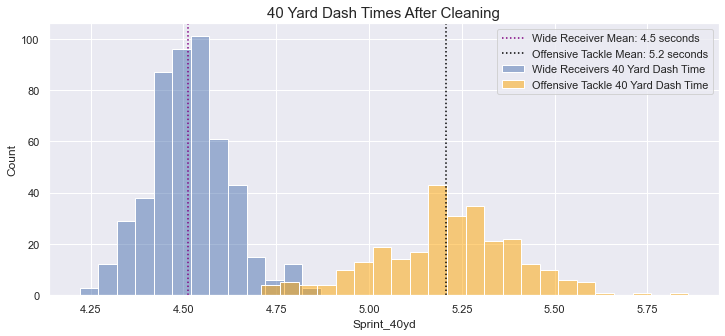

In [24]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=clean_wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=clean_offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(clean_wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(clean_offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times After Cleaning', size=15)
plt.legend();

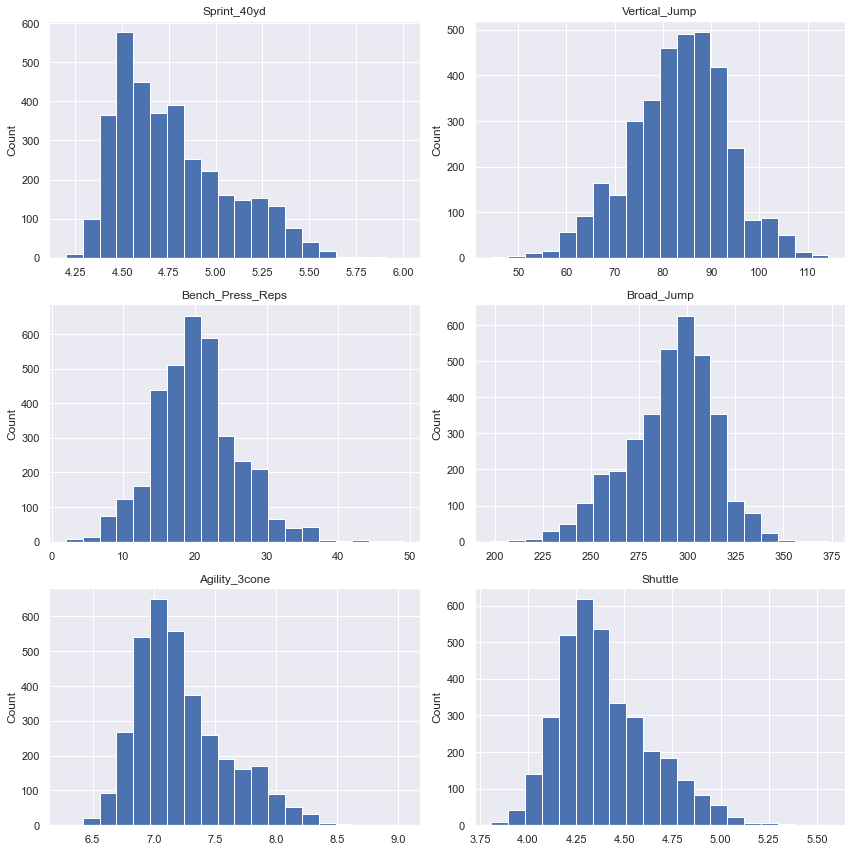

In [25]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(cleaned_df.columns[9:]):
    ax = axes[index//2][index%2]
    ax.hist(cleaned_df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

In [26]:
cleaned_df.head()

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.0,325.12,6.88,4.17
1,2009,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.0,292.10,7.38,4.45
2,2009,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.0,243.23,7.97,4.88
3,2009,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.0,304.80,7.09,4.23
4,2009,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.0,304.80,7.10,4.40


In [27]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3477 non-null   int64  
 1   Age               3477 non-null   float64
 2   School            3477 non-null   object 
 3   Height            3477 non-null   float64
 4   Weight            3477 non-null   float64
 5   BMI               3477 non-null   float64
 6   Player_Type       3477 non-null   object 
 7   Position          3477 non-null   object 
 8   Drafted           3477 non-null   object 
 9   Sprint_40yd       3477 non-null   float64
 10  Vertical_Jump     3477 non-null   float64
 11  Bench_Press_Reps  3477 non-null   float64
 12  Broad_Jump        3477 non-null   float64
 13  Agility_3cone     3477 non-null   float64
 14  Shuttle           3477 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 407.6+ KB


We are almost there! Next we need to change the `School`, `Position`, and `Drafted` columns into one-hot numeric arrays.

In [28]:
cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)

cleaned_df

,Year,Age,Height,Weight,BMI,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Position_OLB,Position_OT,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_TE,Position_WR,Drafted_Yes
0,2009,20.0,1.8542,106.594207,31.004194,4.38,85.09,25.00,325.12,6.88,...,0,0,0,0,1,0,0,0,0,1
1,2009,22.0,1.8796,118.387609,33.510073,4.84,83.82,27.00,292.10,7.38,...,0,0,0,0,0,0,0,0,0,1
2,2009,24.0,2.0066,165.107623,41.005821,5.50,62.50,21.00,243.23,7.97,...,0,0,0,0,0,0,0,0,0,1
3,2009,23.0,1.8034,92.079251,28.312463,4.49,93.98,15.00,304.80,7.09,...,0,0,0,0,0,0,0,0,0,1
4,2009,22.0,1.8796,110.676538,31.327425,4.76,92.71,26.00,304.80,7.10,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,21.0,1.8034,84.821773,26.080939,4.48,95.25,11.00,315.55,6.84,...,0,0,0,0,0,0,0,0,0,0
3473,2019,24.0,1.8288,91.172066,27.260221,4.51,100.33,13.00,325.12,6.84,...,0,0,0,0,0,0,0,0,0,0
3474,2019,24.0,1.8034,88.904105,27.336171,4.47,100.33,15.00,342.90,6.82,...,0,0,0,0,0,0,0,0,0,0
3475,2019,22.0,1.7526,90.264882,29.386861,4.51,82.55,18.00,292.10,7.21,...,0,0,0,0,0,1,0,0,0,0


# Modeling

Now that we have a cleaned dataframe (`cleaned_df`), we can go ahead and start creating our models that can predict whether or not a player was drafted. The steps we are going to follow are below:

### 1. Prepare the Data for Modeling
For a complete end-to-end ML process, we need to create a holdout set that we will use at the very end to evaluate our final model's performance. We can do this by using `train-test-split`. Additionally we will want to us `StandardScaler` on our `X_train`.
### 2. Build and Evaluate a Baseline Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla logistic regression model using log loss and `cross_val_score`.
### 4. Build and Evaluate Additional Logistic Regression Models
Build multiple logistic regression models with different hyperparameters in order to minimize log loss.
### 5. Build a Baseline kNN Model
### 6. Build a Baseline Decision Tree Model
### 7. Build Iterative Models to Find the Best Decision Tree Model
### 8. Choose and Evaluate an Overall Best Model
### 9. Choose and Evaluate a Final Model
Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss.

## 1. Prepare the Data for Modeling
In the cell below, we will use the variable `cleaned_df` in order to create X and y, then training and test sets using `train_test_split` [(documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We will use a `random_state` of 8 to ensure repeatability.

In [29]:
# Split df into X and y
X = cleaned_df.drop(columns='Drafted_Yes', axis=1)
y = cleaned_df['Drafted_Yes']

# Perform train-test split with random_state=8
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

Let's take a look to see if we have roughly equal percentages of drafted vs. not drafted in our train vs. test targets:

In [30]:
print("Train percent drafted vs. undrafted:", y_train.value_counts(normalize=True)[1])
print("Test percent drafted vs undrafted: ", y_test.value_counts(normalize=True)[1])

Train percent drafted vs. undrafted: 0.650939777522056
Test percent drafted vs undrafted:  0.6402298850574712


Now, we are going to instantiate a `StandardScaler`, fit it on `X_train`, and create new variables `X_train_scaled` and `X_test_scaled` containing values transformed with the scaler.

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build and Evaluate a Baseline Model
Using scikit-learn's `LogisticRegression` model, we will instantiate a classifier with `random_state=8`. We will then use cross_val_score with `scoring="neg_log_loss"` to find the average cross-validated log loss for this model on `X_train` and `y_train`.

* [`LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

(Similar to RMSE, the internal implementation of `cross_val_score` requires that we use "negative log loss" instead of just log loss.)

In [32]:
# Instantiate a LogisticRegression with random_state=8
baseline_model = LogisticRegression(random_state=8)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_scaled, y_train, scoring='neg_log_loss')

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.7247512915711221

We can see here that our baseline model gives us a log-loss of 0.72. However, this is hard to interpret if this is a "good" score. Let's look at a model that just chose 1 (the majority class) every time, this is the log-loss we would get:

In [33]:
log_loss(y_train, np.ones(len(y_train)))

12.05639208018036

Loss is a metric where lower is better, so our baseline model is clearly a vast improvement over just guessing the majority class every time.

Even though it is difficult to interpret, the 0.72 value will be a useful baseline as we continue modeling, to see if we are actually making improvements or just getting slightly better performance by chance.

We will also use other metrics at the last step in order to describe the final model's performance in a more user-friendly way.

### 3. Build and Evaluate Additional Logistic Regression Models

Using `GridSearchCV` we are going to see what hyperparameters minimize our log loss. First we are going to try L1 penalties. 

In [37]:
# Definite a log_param_grid
log_L1_param_grid = {'penalty': ['l1'],
                     'solver': ['liblinear', 'saga'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [38]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l1 = GridSearchCV(log_reg, log_L1_param_grid, scoring='neg_log_loss')

# Fit to the data
grid_log_l1.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='neg_log_loss')

In [39]:
# Look at the best parameters from our GridSearchCV
grid_log_l1.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}

In [44]:
# Instantiate a LogisticRegression
model_2 = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='saga', tol=0.1)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
model_2_cv = cross_val_score(model_2, X_train_scaled, y_train, scoring='neg_log_loss').mean() * -1

model_2_cv

0.6241718634820331

Great! We can see here that we improved our log loss by going from 0.724 to 0.624. Next, we are going to try L2 penalties.

In [47]:
# Definite a log_param_grid
log_L2_param_grid = {'penalty': ['l2'],
                     'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [48]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l2 = GridSearchCV(log_reg, log_L2_param_grid, scoring='neg_log_loss')

# Fit to the data
grid_log_l2.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='neg_log_loss')

In [49]:
# Look at the best parameters from our GridSearchCV
grid_log_l2.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}

In [56]:
# Instantiate a LogisticRegression
model_3 = LogisticRegression(penalty='l2', max_iter=1000, C=1, solver='saga', tol=0.1)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
model_3_cv = cross_val_score(model_2, X_train_scaled, y_train, scoring='neg_log_loss')

model_3_cv.mean() * -1

0.623372408444155

Once again it looks like we improved our log loss score! Lets stick with this model and move onto a new model:

* Log Loss: 0.6217
* Penalty: L2
* Max Iter: 1000
* C: 1
* Solver: Saga
* Tol: 0.1